In [13]:
backbones = {'bp' : 'biphenyl', 
             'ta' : 'thianthenes',
             'NN' : None
            }
sidechains = {'pa' : 'diphenylamine', 
              'ma' : 'dimethoxyphenylamine', 
              'cp' : 'dimethylamaine_cyclopropane',
              'NN' : None
             }
size = {'whol' : 'whole',
        'half' : 'half',
       }

back = list(backbones.keys())
side = list(sidechains.keys())
sz = list(size.keys())

molecules = []
for b in back: 
    for s in side: 
        if b == 'NN' and s == 'NN':
            continue
        if b == 'NN' or s == 'NN':
            molecule_name = 'mol_{}_{}_frag'.format(b,s)
            print(molecule_name)
            molecules.append(molecule_name)
        else: 
            for z in sz: 
                molecule_name = 'mol_{}_{}_{}'.format(b,s,z)
                print(molecule_name)
                molecules.append(molecule_name)
# print(molecules)            

mol_bp_pa_whol
mol_bp_pa_half
mol_bp_ma_whol
mol_bp_ma_half
mol_bp_cp_whol
mol_bp_cp_half
mol_bp_NN_frag
mol_ta_pa_whol
mol_ta_pa_half
mol_ta_ma_whol
mol_ta_ma_half
mol_ta_cp_whol
mol_ta_cp_half
mol_ta_NN_frag
mol_NN_pa_frag
mol_NN_ma_frag
mol_NN_cp_frag


C:\Users\Rebekah\anaconda3\envs\scaffold\lib\site-packages\ocelot-0.2-py3.7.egg\ocelot\routines\conformerparser.py:106: UserWarning: AP parser cannot use radical scheme, trying to use charged frag
  warnings.warn('AP parser cannot use radical scheme, trying to use charged frag')


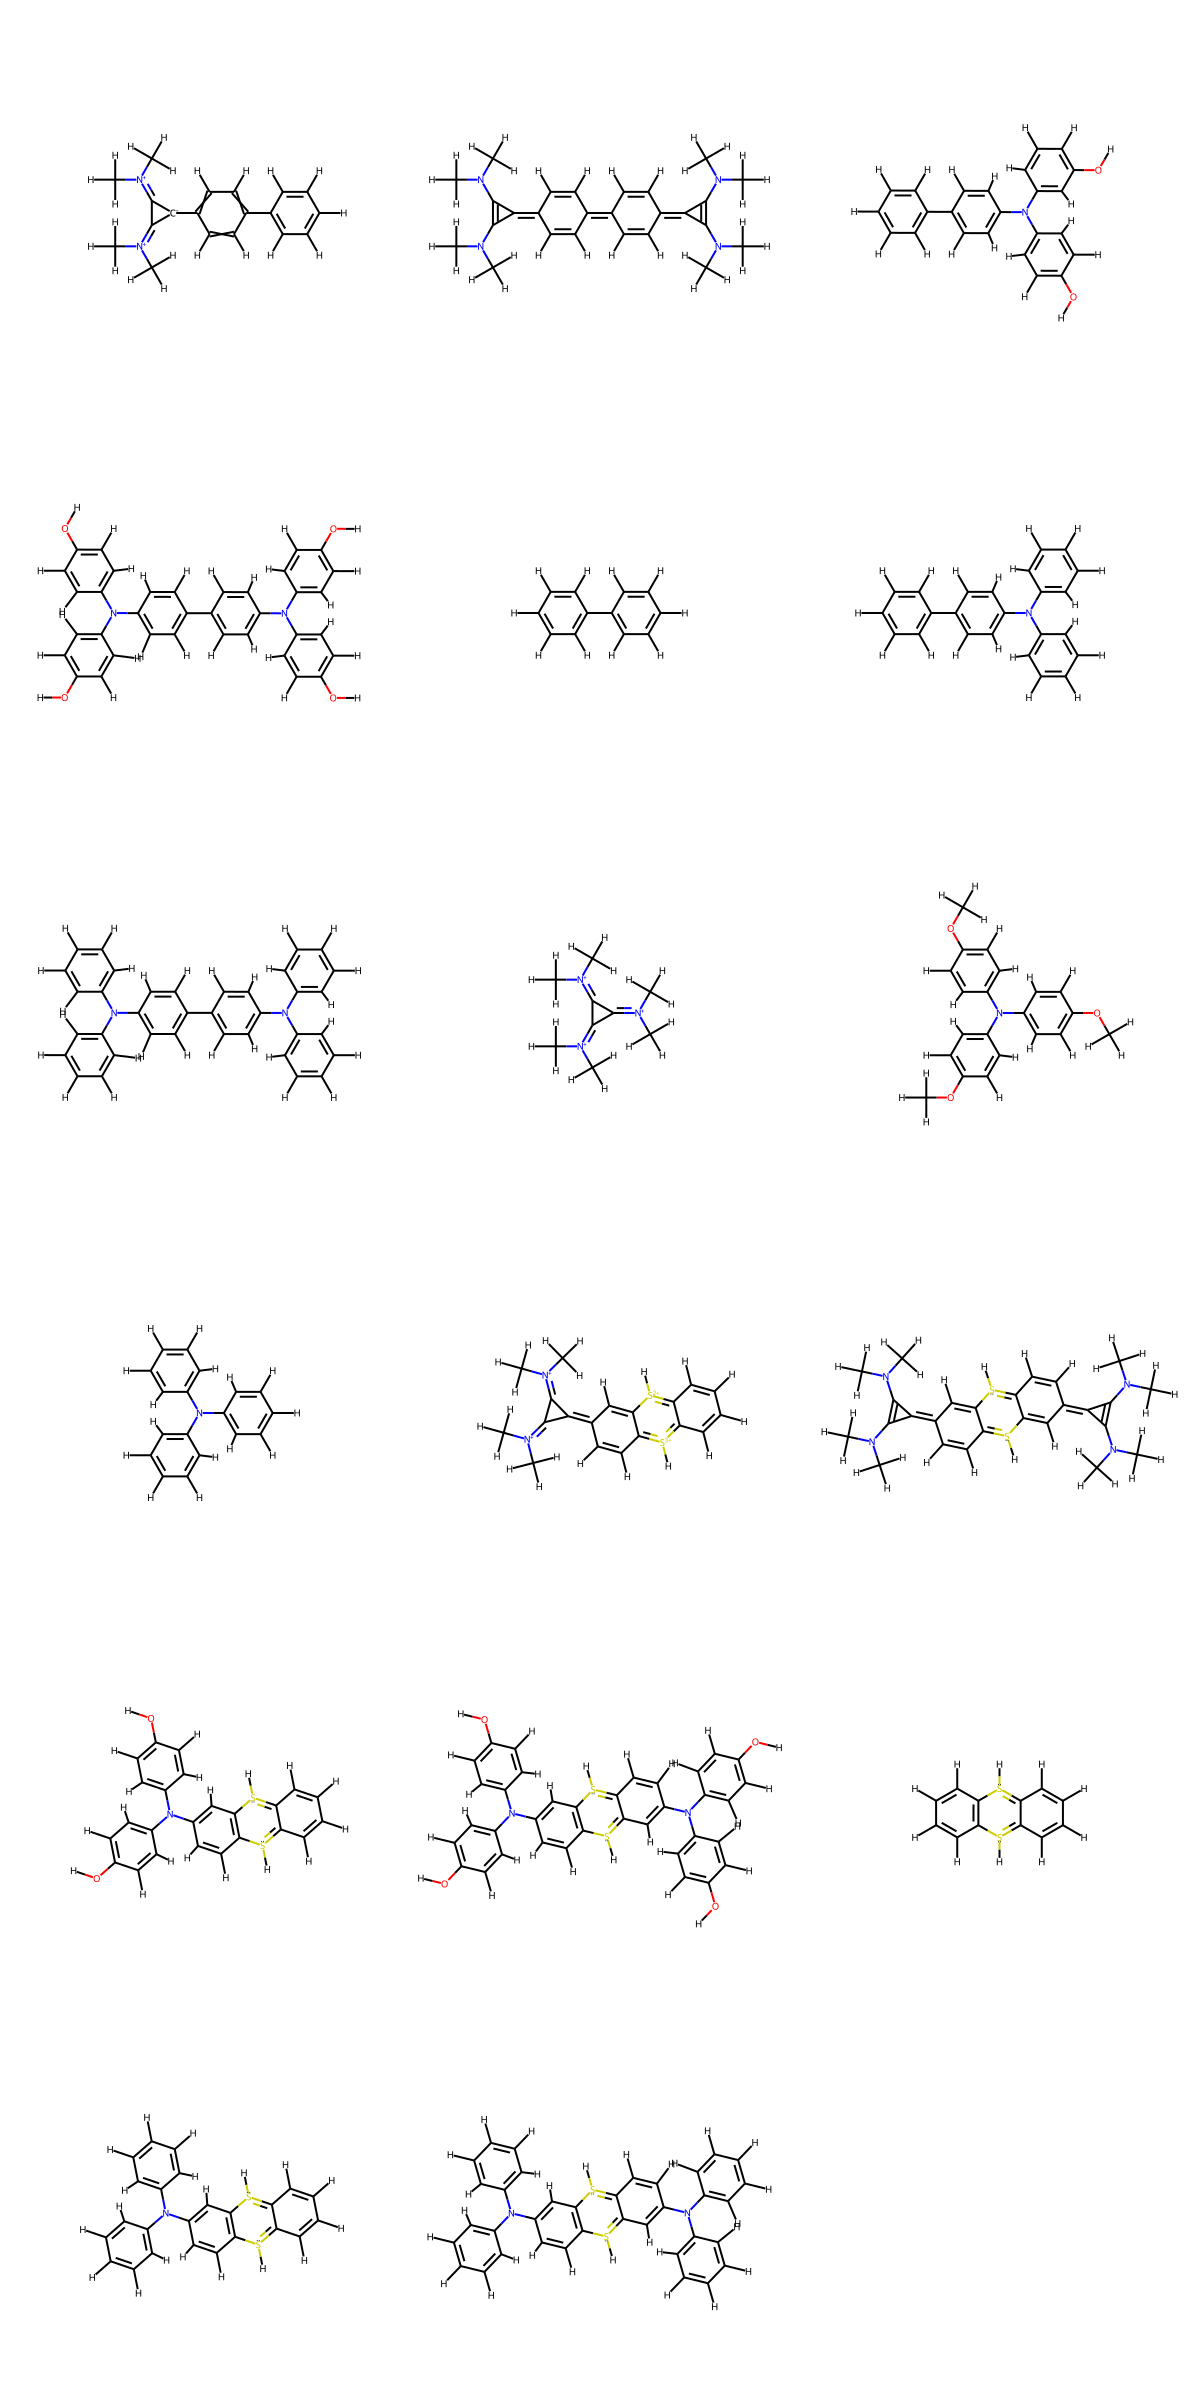

In [12]:
import os
import ocelot
import matplotlib
from pymatgen import Molecule
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, MolToSmiles, MolFromSmiles
from ocelot.routines.conformerparser import pmgmol_to_rdmol

def XYZtoGJF(fn):
    """
    Convert an individually imputted xyz file to a gjf Gaussian input file
    """
    mol = Molecule.from_file(fn)
    gau = GaussianInput(mol=mol,charge=0,spin_multiplicity=1,functional='wB97XD',basis_set='cc-pVDZ',  route_parameters={"opt":""}, link0_parameters={'%mem':'5GB','%chk':'{}.chk'.format(mol_name)})
    gjf_file = gau.write_file('{}.gjf'.format(fn.split('.')[0]))
    return gjf_file

home = os.getcwd()
xyz_path = os.path.join(home, 'xyz')
mols = []
gau_in_path = os.path.join(home, 'gau_input')
for i in os.listdir(xyz_path):
    ipath = os.path.join(xyz_path,i)
    pymat_mol = Molecule.from_file(ipath)
    rd_mol = pmgmol_to_rdmol(pymat_mol)
    smi_mol = MolToSmiles(rd_mol[0])
    tmp=AllChem.Compute2DCoords(rd_mol[0])
    mols.append(rd_mol[0])

Draw.MolsToGridImage(mols,subImgSize=(400,400))
#      XYZtoGJF(ipath)